Episode 1: Total reward = -48.70000000000004
Episode 2: Total reward = -48.70000000000007
Episode 3: Total reward = -41.500000000000064
Episode 4: Total reward = -51.400000000000055
Episode 5: Total reward = -51.40000000000005
Episode 6: Total reward = -47.80000000000006
Episode 7: Total reward = -39.70000000000006
Episode 8: Total reward = -47.800000000000026
Episode 9: Total reward = -32.50000000000006
Episode 10: Total reward = -55.00000000000003
Episode 11: Total reward = -39.70000000000005
Episode 12: Total reward = -49.60000000000005
Episode 13: Total reward = -36.100000000000065
Episode 14: Total reward = -42.40000000000005
Episode 15: Total reward = -44.20000000000005
Episode 16: Total reward = -35.30000000000004
Episode 17: Total reward = -42.400000000000055
Episode 18: Total reward = -46.00000000000007
Episode 19: Total reward = -39.70000000000006
Episode 20: Total reward = -42.40000000000003
Episode 21: Total reward = -42.400000000000034
Episode 22: Total reward = -38.800000

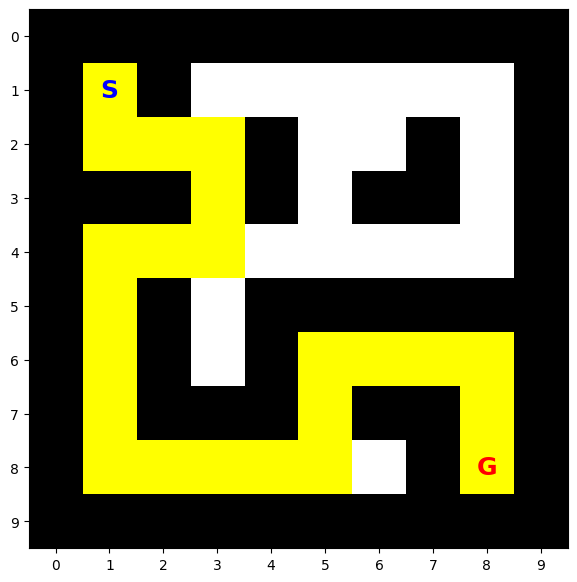

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Maze setup (0: open, 1: wall)
maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

# Start and goal positions
start = (1, 1)
goal = (8, 8)

colors = ["white", "black", "yellow"]
cmap = ListedColormap(colors)

# Q-learning parameters
gamma = 0.9  # Discount factor
alpha = 0.8  # Learning rate
epsilon = 0.9  # Exploration factor
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
n_actions = len(actions)

# Q-table initialization
q_table = np.zeros((*maze.shape, n_actions))

# Function to check if a move is valid
def is_valid_move(maze, pos):
    return 0 <= pos[0] < maze.shape[0] and 0 <= pos[1] < maze.shape[1] and maze[pos] == 0

# Function to choose an action using epsilon-greedy strategy
def choose_action(state, q_table, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(n_actions))
    else:
        return np.argmax(q_table[state])

# Function to update the Q-table
def update_q_table(q_table, state, action, reward, next_state):
    next_max = np.max(q_table[next_state])
    q_table[state][action] += alpha * (reward + gamma * next_max - q_table[state][action])

# Training the agent
def train_agent(maze, episodes):
    global epsilon
    for episode in range(episodes):
        state = start
        total_reward = 0

        for step in range(100):
            action_idx = choose_action(state, q_table, epsilon)
            action = actions[action_idx]
            next_state = (state[0] + action[0], state[1] + action[1])

            if not is_valid_move(maze, next_state):
                reward = -1
                next_state = state
            elif next_state == goal:
                reward = 100
                update_q_table(q_table, state, action_idx, reward, next_state)
                break
            else:
                reward = -0.1

            update_q_table(q_table, state, action_idx, reward, next_state)
            state = next_state
            total_reward += reward

        epsilon = max(0.1, epsilon * 0.99)
        print(f"Episode {episode + 1}: Total reward = {total_reward}")

# Function to get the learned path based on the Q-table
def get_learned_path(q_table, maze, start=(1,1), goal=(8,8)):
    state = start
    path = [state]

    # Keep moving until reach the goal
    while state != goal:
        # Choose the action with the highest Q-value
        action_idx = np.argmax(q_table[state])
        action = actions[action_idx]

        # Calculate the next state
        next_state = (state[0] + action[0], state[1] + action[1])

        # Check if the move is valid
        if not is_valid_move(maze, next_state):
            break

        state = next_state  # Move to the next state
        path.append(state)  # Append the state to the path

    return path

# Function to display the maze and a path
def show_maze(maze, path, start, goal):
    maze_copy = np.copy(maze)

    # Marking the path with 2
    for position in path:
        maze_copy[position] = 2

    # Displaying the maze with the path, start, and goal points
    plt.figure(figsize=(7,7))
    plt.imshow(maze_copy, cmap=cmap, interpolation="nearest")

    # Mark start and goal positions
    plt.text(start[1], start[0], 'S', color='blue', ha='center', va='center', fontsize=18, fontweight='bold')
    plt.text(goal[1], goal[0], 'G', color='red', ha='center', va='center', fontsize=18, fontweight='bold')

    plt.xticks(range(maze.shape[1]))
    plt.yticks(range(maze.shape[0]))
    plt.grid(False)
    plt.show()

# Train the agent
train_agent(maze, episodes=1000)

# Get the learned path
learned_path = get_learned_path(q_table, maze)

# Evaluate and display the final path
show_maze(maze, learned_path, start, goal)


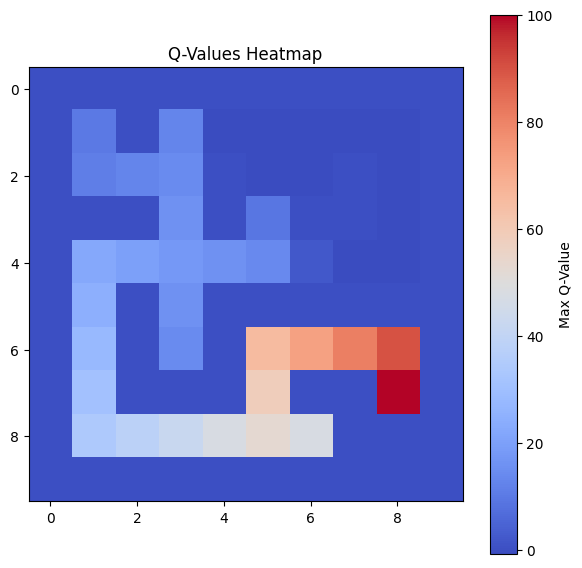

In [30]:
# Visualization of Q-values
def visualize_q_values(q_table):
    q_values_max = np.max(q_table, axis=2)

    plt.figure(figsize=(7, 7))
    plt.imshow(q_values_max, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Max Q-Value')
    plt.title('Q-Values Heatmap')
    plt.grid(False)
    plt.show()

visualize_q_values(q_table)
